In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline
import seaborn as sn

In [2]:
import geopandas as gpd
import pandas as pd

### Load the 50 citis data

### Heatwave Count

In [3]:
heatwave_count = pd.read_csv(r"/global/cfs/cdirs/m1532/Projects_MVP/geospatial/climate_heatwave/city_heatwave/city_heatwave/PRISM_city_heatwave/city_heatwave_count_monthly_1960_2019.csv").drop(columns={'Unnamed: 0'})
heatwave_count

,year,month,city_name,heatwave_count
0,1960,1,Albany,0
1,1960,1,Albuquerque,0
2,1960,1,Allentown,0
3,1960,1,Atlanta,0
4,1960,1,Austin,0
...,...,...,...,...
35995,2019,12,Seattle,0
35996,2019,12,St. Louis,0
35997,2019,12,Tampa,0
35998,2019,12,Tucson,0


In [4]:
heatwave_count['heatwave_count'].describe()

count    36000.000000
mean         0.204639
std          0.607358
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: heatwave_count, dtype: float64

In [5]:
heatwave_count = heatwave_count.drop('month', axis = 1)
heatwave_count = heatwave_count.groupby(['year', 'city_name']).sum()
heatwave_count = heatwave_count.reset_index()
heatwave_count.head()

,year,city_name,heatwave_count
0,1960,Albany,0
1,1960,Albuquerque,1
2,1960,Allentown,0
3,1960,Atlanta,1
4,1960,Austin,1


In [6]:
def printCityNumbers(df, years):
    city_numbers = []
    for year in years:
        dict_year = {}
        df_year = df[df['year'] == year]
        numbers = len(df_year['city_name'].unique())
        dict_year[year] = numbers
        city_numbers.append(dict_year)
    return city_numbers

In [7]:
len(heatwave_count['city_name'].unique())

50

In [8]:
years = [year for year in range(1960, 2020)]

In [9]:
city_numbers_Count = printCityNumbers(heatwave_count, years)
city_numbers_Count

[{1960: 50},
 {1961: 50},
 {1962: 50},
 {1963: 50},
 {1964: 50},
 {1965: 50},
 {1966: 50},
 {1967: 50},
 {1968: 50},
 {1969: 50},
 {1970: 50},
 {1971: 50},
 {1972: 50},
 {1973: 50},
 {1974: 50},
 {1975: 50},
 {1976: 50},
 {1977: 50},
 {1978: 50},
 {1979: 50},
 {1980: 50},
 {1981: 50},
 {1982: 50},
 {1983: 50},
 {1984: 50},
 {1985: 50},
 {1986: 50},
 {1987: 50},
 {1988: 50},
 {1989: 50},
 {1990: 50},
 {1991: 50},
 {1992: 50},
 {1993: 50},
 {1994: 50},
 {1995: 50},
 {1996: 50},
 {1997: 50},
 {1998: 50},
 {1999: 50},
 {2000: 50},
 {2001: 50},
 {2002: 50},
 {2003: 50},
 {2004: 50},
 {2005: 50},
 {2006: 50},
 {2007: 50},
 {2008: 50},
 {2009: 50},
 {2010: 50},
 {2011: 50},
 {2012: 50},
 {2013: 50},
 {2014: 50},
 {2015: 50},
 {2016: 50},
 {2017: 50},
 {2018: 50},
 {2019: 50}]

In [10]:
def findDecade(year):
    if year >= 1960 and year <= 1969:
        return '1960s'
    elif year >= 1970 and year <= 1979:
        return '1970s'
    elif year >= 1980 and year <= 1989:
        return '1980s'
    elif year >= 1990 and year <= 1999:
        return '1990s'
    elif year >= 2000 and year <= 2009:
        return '2000s'
    elif year >= 2010 and year <= 2019:
        return '2010s'
    else:
        return '2020s'

In [11]:
heatwave_count['decade'] = heatwave_count['year'].apply(findDecade)
heatwave_count

,year,city_name,heatwave_count,decade
0,1960,Albany,0,1960s
1,1960,Albuquerque,1,1960s
2,1960,Allentown,0,1960s
3,1960,Atlanta,1,1960s
4,1960,Austin,1,1960s
...,...,...,...,...
2995,2019,Seattle,7,2010s
2996,2019,St. Louis,2,2010s
2997,2019,Tampa,11,2010s
2998,2019,Tucson,4,2010s


In [12]:
len(heatwave_count['city_name'].unique())

50

In [13]:
heatwave_count.columns

Index(['year', 'city_name', 'heatwave_count', 'decade'], dtype='object')

In [14]:
heatwave_year = heatwave_count.drop(['city_name'], axis = 1)
#heatwave_nonzero = heatwave_year[heatwave_year['heatwave_count'] > 0]
heatwave_year = heatwave_year[heatwave_year['heatwave_count'] > 0]
heatwave_year = heatwave_year.groupby(['year', 'decade']).mean()
heatwave_year = heatwave_year.reset_index()
heatwave_year

,year,decade,heatwave_count
0,1960,1960s,1.550000
1,1961,1960s,2.250000
2,1962,1960s,1.875000
3,1963,1960s,1.933333
4,1964,1960s,1.970588
5,1965,1960s,1.625000
6,1966,1960s,1.837838
7,1967,1960s,2.000000
8,1968,1960s,2.368421
9,1969,1960s,2.977273


In [15]:
heatwave_year['heatwave_count'].describe()

count    60.000000
mean      2.839741
std       1.050678
min       1.447368
25%       1.994444
50%       2.522233
75%       3.576531
max       5.700000
Name: heatwave_count, dtype: float64

In [16]:
decades = list(heatwave_year['decade'].unique())

In [17]:
for dec in decades:
    df_decade = heatwave_year[heatwave_year['decade'] == dec]
    print(dec, df_decade['heatwave_count'].mean())

1960s 2.0387453186369595
1970s 2.070057368483284
1980s 2.4719712752734044
1990s 2.8729347267030763
2000s 3.122714083957245
2010s 4.462026222116753


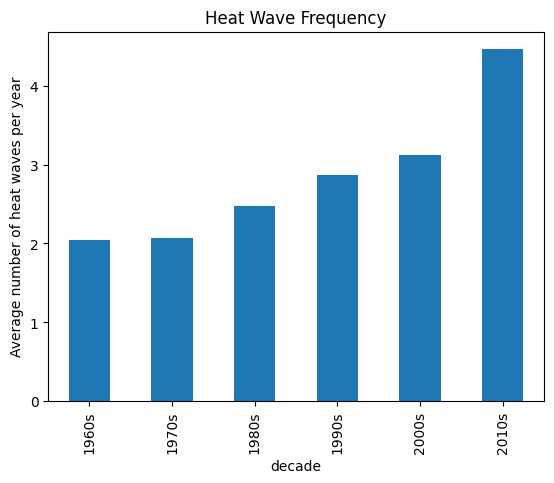

In [18]:
averages = heatwave_year.groupby('decade')['heatwave_count'].mean()
averages.plot(kind='bar')
plt.xlabel('decade')
plt.ylabel('Average number of heat waves per year')
plt.title('Heat Wave Frequency')
plt.show()

### Heatwave duration

In [19]:
heatwave_duration = pd.read_csv(r"/global/cfs/cdirs/m1532/Projects_MVP/geospatial/climate_heatwave/city_heatwave/city_heatwave/PRISM_city_heatwave/city_heatwave_duration_1960_2019.csv").drop(columns={'Unnamed: 0'})
heatwave_duration

,year,city_name,AT_min,heatwave_duration
0,1960,Albuquerque,8,2
1,1960,Atlanta,2,2
2,1960,Austin,2,3
3,1960,Baton Rouge,6,2
4,1960,Baton Rouge,8,2
...,...,...,...,...
7282,2019,Tucson,6,5
7283,2019,Tucson,10,5
7284,2019,Tucson,4,3
7285,2019,Tulsa,2,3


In [20]:
city_numbers_Duration = printCityNumbers(heatwave_duration, years)
city_numbers_Duration

[{1960: 20},
 {1961: 36},
 {1962: 16},
 {1963: 30},
 {1964: 34},
 {1965: 32},
 {1966: 37},
 {1967: 25},
 {1968: 38},
 {1969: 44},
 {1970: 41},
 {1971: 34},
 {1972: 38},
 {1973: 28},
 {1974: 22},
 {1975: 25},
 {1976: 18},
 {1977: 46},
 {1978: 44},
 {1979: 34},
 {1980: 49},
 {1981: 47},
 {1982: 34},
 {1983: 46},
 {1984: 27},
 {1985: 38},
 {1986: 42},
 {1987: 44},
 {1988: 48},
 {1989: 44},
 {1990: 38},
 {1991: 43},
 {1992: 32},
 {1993: 46},
 {1994: 41},
 {1995: 49},
 {1996: 44},
 {1997: 46},
 {1998: 50},
 {1999: 48},
 {2000: 45},
 {2001: 49},
 {2002: 49},
 {2003: 44},
 {2004: 45},
 {2005: 47},
 {2006: 50},
 {2007: 50},
 {2008: 45},
 {2009: 50},
 {2010: 50},
 {2011: 50},
 {2012: 50},
 {2013: 48},
 {2014: 43},
 {2015: 49},
 {2016: 50},
 {2017: 48},
 {2018: 49},
 {2019: 50}]

In [21]:
len(heatwave_duration['city_name'].unique())

50

In [22]:
heatwave_duration['decade'] = heatwave_duration['year'].apply(findDecade)
heatwave_duration

,year,city_name,AT_min,heatwave_duration,decade
0,1960,Albuquerque,8,2,1960s
1,1960,Atlanta,2,2,1960s
2,1960,Austin,2,3,1960s
3,1960,Baton Rouge,6,2,1960s
4,1960,Baton Rouge,8,2,1960s
...,...,...,...,...,...
7282,2019,Tucson,6,5,2010s
7283,2019,Tucson,10,5,2010s
7284,2019,Tucson,4,3,2010s
7285,2019,Tulsa,2,3,2010s


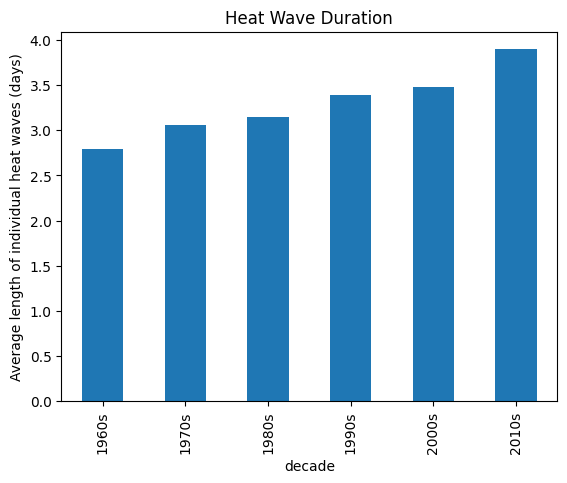

In [23]:
averages = heatwave_duration.groupby('decade')['heatwave_duration'].mean()
averages.plot(kind='bar')
plt.xlabel('decade')
plt.ylabel('Average length of individual heat waves (days)')
plt.title('Heat Wave Duration')
plt.show()

### Heatwave Season Length

In [24]:
heatwave_length = pd.read_csv(r"/global/cfs/cdirs/m1532/Projects_MVP/geospatial/climate_heatwave/city_heatwave/city_heatwave/PRISM_city_heatwave/city_heatwave_season_length_1960_2019.csv", dtype = {'year': int}).drop(columns={'Unnamed: 0'})
heatwave_length

,year,city_name,heatwave_season_length
0,1960,Albuquerque,2
1,1960,Atlanta,2
2,1960,Austin,3
3,1960,Baton Rouge,6
4,1960,Chicago,46
...,...,...,...
2454,2019,Seattle,88
2455,2019,St. Louis,21
2456,2019,Tampa,86
2457,2019,Tucson,28


In [26]:
len(heatwave_length['city_name'].unique())

50

In [27]:
heatwave_length['decade'] = heatwave_duration['year'].apply(findDecade)
heatwave_length

,year,city_name,heatwave_season_length,decade
0,1960,Albuquerque,2,1960s
1,1960,Atlanta,2,1960s
2,1960,Austin,3,1960s
3,1960,Baton Rouge,6,1960s
4,1960,Chicago,46,1960s
...,...,...,...,...
2454,2019,Seattle,88,1990s
2455,2019,St. Louis,21,1990s
2456,2019,Tampa,86,1990s
2457,2019,Tucson,28,1990s


In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
heatwave_1960s = heatwave_length[(heatwave_length['year']>= 1961)&(heatwave_length['year']<= 1970)]
heatwave_1960s['decade'] = '1960s'
heatwave_1970s = heatwave_length[(heatwave_length['year']>= 1971)&(heatwave_length['year']<= 1980)]
heatwave_1970s['decade'] = '1970s'
heatwave_1980s = heatwave_length[(heatwave_length['year']>= 1981)&(heatwave_length['year']<= 1990)]
heatwave_1980s['decade'] = '1980s'
heatwave_1990s = heatwave_length[(heatwave_length['year']>= 1991)&(heatwave_length['year']<= 2000)]
heatwave_1990s['decade'] = '1990s'
heatwave_2000s = heatwave_length[(heatwave_length['year']>= 2001)&(heatwave_length['year']<= 2010)]
heatwave_2000s['decade'] = '2000s'
heatwave_2010s = heatwave_length[(heatwave_length['year']>= 2011)&(heatwave_length['year']<= 2020)]
heatwave_2010s['decade'] = '2010s'
heatwave_2020s = heatwave_length[heatwave_length['year'] >= 2021]
heatwave_2020s['decade'] = '2020s'

In [30]:
heatwave_length = pd.concat([heatwave_1960s, heatwave_1970s, heatwave_1980s, heatwave_1990s, heatwave_2000s, heatwave_2010s, heatwave_2020s])
heatwave_length

,year,city_name,heatwave_season_length,decade
20,1961,Albany,47,1960s
21,1961,Allentown,36,1960s
22,1961,Austin,2,1960s
23,1961,Baltimore,2,1960s
24,1961,Boston,35,1960s
...,...,...,...,...
2454,2019,Seattle,88,2010s
2455,2019,St. Louis,21,2010s
2456,2019,Tampa,86,2010s
2457,2019,Tucson,28,2010s


In [31]:
heatwave_length['decade'].unique()

array(['1960s', '1970s', '1980s', '1990s', '2000s', '2010s'], dtype=object)

In [32]:
heatwave_length['year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

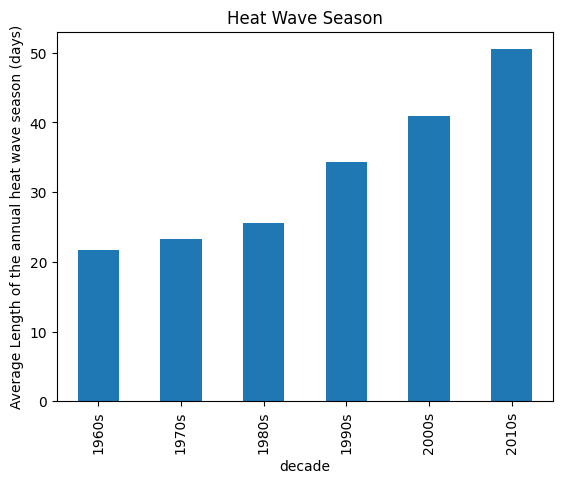

In [33]:
averages = heatwave_length.groupby('decade')['heatwave_season_length'].mean()
averages.plot(kind='bar')
plt.xlabel('decade')
plt.ylabel('Average Length of the annual heat wave season (days)')
plt.title('Heat Wave Season')
plt.show()

#### Heatwave Intensity

In [34]:
heatwave_intensity = pd.read_csv(r"/global/cfs/cdirs/m1532/Projects_MVP/geospatial/climate_heatwave/city_heatwave/city_heatwave/PRISM_city_heatwave/city_heatwave_intensity_1960_2019.csv", dtype={'year': int}).drop(columns={'Unnamed: 0'})
heatwave_intensity

,year,city_name,heatwave_intensity
0,1960,Albuquerque,3.875958
1,1960,Atlanta,1.390346
2,1960,Austin,0.599297
3,1960,Baton Rouge,1.084929
4,1960,Baton Rouge,0.582137
...,...,...,...
7282,2019,Tucson,1.693777
7283,2019,Tucson,2.035266
7284,2019,Tucson,1.243578
7285,2019,Tulsa,1.811961


In [35]:
heatwave_intensity['decade'] = heatwave_intensity['year'].apply(findDecade)
heatwave_intensity

,year,city_name,heatwave_intensity,decade
0,1960,Albuquerque,3.875958,1960s
1,1960,Atlanta,1.390346,1960s
2,1960,Austin,0.599297,1960s
3,1960,Baton Rouge,1.084929,1960s
4,1960,Baton Rouge,0.582137,1960s
...,...,...,...,...
7282,2019,Tucson,1.693777,2010s
7283,2019,Tucson,2.035266,2010s
7284,2019,Tucson,1.243578,2010s
7285,2019,Tulsa,1.811961,2010s


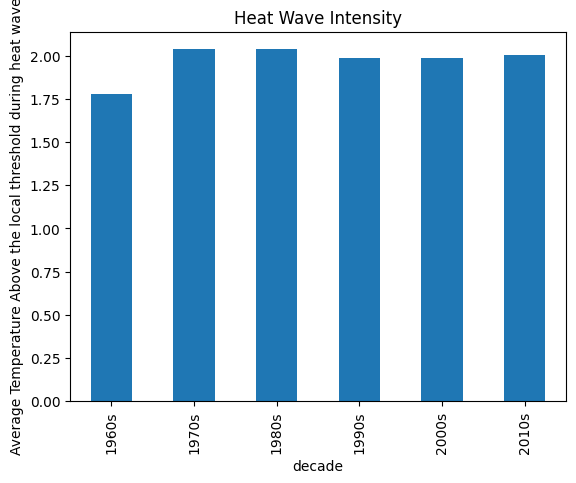

In [36]:
averages = heatwave_intensity.groupby('decade')['heatwave_intensity'].mean()
averages.plot(kind='bar')
plt.xlabel('decade')
plt.ylabel('Average Temperature Above the local threshold during heat wave(F)')
plt.title('Heat Wave Intensity')
plt.show()